In [5]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
%matplotlib inline

def vsffit(lag,lna,p):
    return (lna+p*lag)

ddir = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr04/'

dcloud = ['M3','M4','M8']
color  = ['red','green','blue']
xlim   = [0.6,41]
ylim   = [4e-2,7e1]

ms = 12
lw = 4

In [35]:
zeta  = np.zeros((3,3,70))
z     = np.zeros((3,3,70))
ezeta = np.zeros((3,3,70))
ez    = np.zeros((3,3,70))
timeline = np.zeros((3,3,70))

for icloud in range(len(dcloud)):
    cloud  = dcloud[icloud]
    
    ffiles = glob(('%svel_struc_func_%s_*.dat' % (ddir,cloud)))
    ffiles.sort()
    
    for itime in range(len(ffiles)):
        ifile = ffiles[itime]
        time  = ifile[67:71]
        
        lag,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
        lag,s1,s2,s3 = np.loadtxt(ifile,skiprows=2,usecols=(0,1,2,3),unpack=True)

        for p in range(1,4):
            if(p==1): vsf = s1
            if(p==2): vsf = s2
            if(p==3): vsf = s3

            h = np.where(lag <= 8.)[0]
            popt, pcov = curve_fit(vsffit,np.log10(lag[h]),np.log10(vsf[h]))
            
            zeta[icloud,p-1,itime]  = popt[1]
            ezeta[icloud,p-1,itime] = np.sqrt(pcov[1,1])
            
        for p in range(3):
            timeline[icloud,p,itime] = 0.1*float(time)
            z[icloud,p,itime]  = zeta[icloud,p,itime]/zeta[icloud,2,itime]
            ez[icloud,p,itime] = np.sqrt((ezeta[icloud,p,itime]/zeta[icloud,2,itime])**2 + (ezeta[icloud,2,itime]*zeta[icloud,p,itime]/(zeta[icloud,2,itime]**2))**2)

/Users/roxanachira/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/Users/roxanachira/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


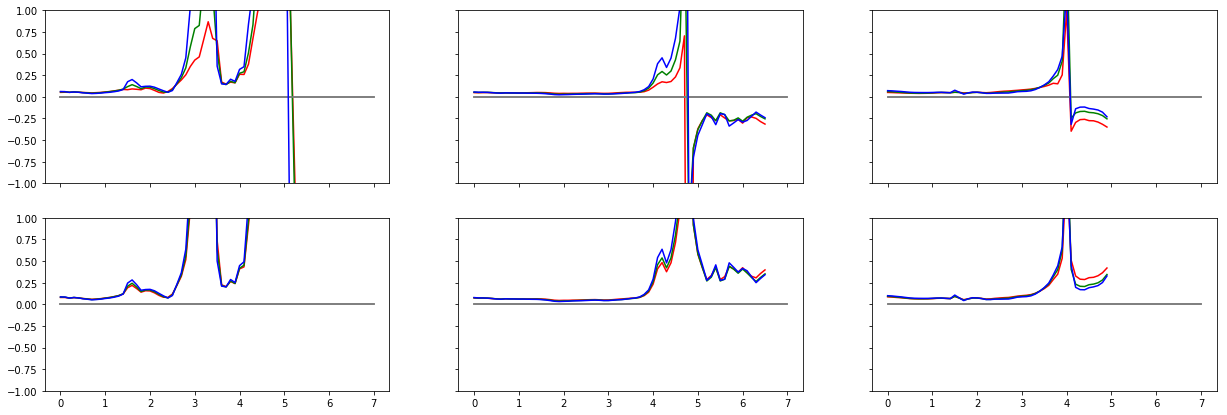

In [50]:
fig,ax = plt.subplots(nrows=2,ncols=len(dcloud),sharex=True,sharey=True,figsize=(21,7))
for ierror,icloud,p in itertools.product(range(2),range(len(dcloud)),range(3)):
    cloud = dcloud[icloud]
    
    ax[ierror,icloud].plot(np.array([0.0,7.0]),np.zeros(2),color='grey')
    
    time  = timeline[icloud,p,:]
    if(ierror == 0): data  = ezeta[icloud,p,:]/zeta[icloud,p,:]
    else: data  = ez[icloud,p,:]/z[icloud,p,:]
    
    htime = np.where(time == 0.0)[0]
    htime = htime[1:]
    time  = np.delete(time,htime)
    data  = np.delete(data,htime)
    
    ax[ierror,icloud].plot(time,data,color=color[p])
    ax[ierror,icloud].set_ylim([-1,1])

In [58]:
for ierror,icloud,p in itertools.product(range(2),range(len(dcloud)),range(3)):
    if(ierror == 0): 
        data  = ezeta[icloud,p,:]/zeta[icloud,p,:]
        text  = 'zeta'
    else: 
        data  = ez[icloud,p,:]/z[icloud,p,:]
        text  = 'Z'
    
    time  = timeline[icloud,p,:]
    htime = np.where(time == 0.0)[0]
    htime = htime[1:]
    time  = np.delete(time,htime)
    data  = np.delete(data,htime)
    
    print( '%s, %i, %s:\t%7.2f \t %7.2f' % (dcloud[icloud], (p+1), text, 100.*np.mean(data), 100.*np.median(data)) )

M3, 1, zeta:	   8.13 	    9.06
M3, 2, zeta:	  18.91 	   11.30
M3, 3, zeta:	  90.05 	   12.23
M4, 1, zeta:	 -15.10 	    4.46
M4, 2, zeta:	   0.48 	    3.77
M4, 3, zeta:	   9.60 	    3.48
M8, 1, zeta:	   2.06 	    4.84
M8, 2, zeta:	   6.08 	    4.86
M8, 3, zeta:	   5.89 	    4.99
M3, 1, Z:	 198.61 	   19.21
M3, 2, Z:	 201.91 	   20.07
M3, 3, Z:	 261.05 	   21.02
M4, 1, Z:	  45.35 	    7.03
M4, 2, Z:	  35.36 	    7.13
M4, 3, Z:	  41.06 	    7.25
M8, 1, Z:	  18.13 	    8.16
M8, 2, Z:	  18.07 	    8.17
M8, 3, Z:	  17.04 	    8.45


/Users/roxanachira/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/roxanachira/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [52]:
zeta

array([[[ 0.57982972,  0.58010733,  0.57766191,  0.56649082,  0.55465164,
          0.54357339,  0.52699208,  0.51025864,  0.48993338,  0.46963995,
          0.44830711,  0.42573043,  0.40117831,  0.37227431,  0.35120301,
          0.37219593,  0.36684716,  0.35373985,  0.33662671,  0.28219822,
          0.25875924,  0.25278237,  0.25268116,  0.24209877,  0.22043499,
          0.19427209,  0.17096687,  0.15179919,  0.1374058 ,  0.12223747,
          0.10369232,  0.09648249,  0.07894641,  0.06500984,  0.07489615,
          0.06975301,  0.19977789,  0.18697262,  0.15092068,  0.12521902,
          0.10867962,  0.10403763,  0.09316677,  0.07923505,  0.06657294,
          0.05337114,  0.02515192, -0.01796984, -0.01911858,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.

In [65]:
fout = open('/Users/roxanachira/Dropbox/chira2018/pics/data/error_vsfhr04.dat','w')

fout.write('cloud\te_quantity\torder\ttime [Myr]\tvalue\n')

for icloud,ierror,p in itertools.product(range(len(dcloud)),range(2),range(3)):
    if(ierror == 0):
        error = ezeta[icloud,p,:]
        text  = 'e_zeta'
    else:
        error = ez[icloud,p,:]
        text  = 'e_Z'

    time  = timeline[icloud,p,:]
    htime = np.where(time == 0.0)[0]
    htime = htime[1:]
    time  = np.delete(time,htime)
    error = np.delete(error,htime)
    
    for j in range(len(time)):
        fout.write('%s\t%s\t%i\t%4.1f\t%9.4f\n' % (dcloud[icloud],text,p+1,time[j],error[j]))
    
fout.close()

In [62]:
error

array([ 0.02957834,  0.03034327,  0.02970613,  0.03063004,  0.02912999,
        0.02690377,  0.02503533,  0.02302558,  0.02331174,  0.02368495,
        0.02487754,  0.02587669,  0.02732587,  0.02816804,  0.02978273,
        0.03047973,  0.03324502,  0.0305748 ,  0.02728454,  0.02827464,
        0.02441343,  0.01855521,  0.0128208 ,  0.01045809,  0.01340725,
        0.01844084,  0.02466506,  0.02948858,  0.03490896,  0.04275781,
        0.04395831,  0.04448487,  0.05231501,  0.0563867 ,  0.05058305,
        0.0451408 ,  0.03375865,  0.02749397,  0.02551701,  0.02018497,
        0.02825224,  0.02680788,  0.03503924,  0.05345215,  0.06444481,
        0.06549704,  0.09192545,  0.10950457,  0.08357416,  0.06286352,
        0.06312111,  0.05775613,  0.05967468,  0.05498665,  0.04833988,
        0.04310534,  0.03740109,  0.037722  ,  0.0391744 ,  0.04198349,
        0.04382959,  0.04643114,  0.04810746,  0.05392711,  0.08278927,
        0.10205462,  0.08372092,  0.06243851,  0.0574025 ,  0.05